# Data Viz with Matplotlib 4

Welcome to the last workshop of this series. Today we are exploring histograms and, if time permits, we will check an interactive backend for `matplotlib`.

First, we will load the same data as yesterday. We will use the same code we used before to load data directly from GitHub.

In [2]:
import pandas as pd
import numpy as np

# Morgan data
morgan_data_url = r'https://raw.githubusercontent.com/non87/python-viz-workshop/main/data/morgan.csv?token=AFYWZVDAI4YWMTWTVOC4OLTBAYQXQ'
morgan = pd.read_csv(morgan_data_url)

# Taylor data
taylor_data_url = r'https://raw.githubusercontent.com/non87/python-viz-workshop/main/data/taylor.csv?token=AFYWZVEKG347XBSW52TUM3DBAYQZ6'
taylor = pd.read_csv(taylor_data_url)

# Look at the column names and data type
print(f'{morgan.info()}')
print(f"This is how the Morgan data looks like:\n\n{morgan.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Girls       50 non-null     int64  
 1   Total       50 non-null     int64  
 2   Proportion  50 non-null     float64
 3   Year        50 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.7 KB
None
This is how the Morgan data looks like:

   Girls  Total  Proportion  Year
0     44    252    0.174603  1965
1     34    258    0.131783  1966
2     43    314    0.136943  1967
3     36    299    0.120401  1968
4     63    396    0.159091  1969


To produce histograms we will need to massage the data a little and transform it in a different (clearly less convenient) format. More explanation on the format below. 

I will use `numpy` and `pandas` for this passage, do not worry about understanding the code.

In [18]:
# Morgan data
# Collect the data from the DataFrame
morgan_girls = np.int_(morgan.Proportion * morgan.Total)
morgan_girls_yr = np.int_(morgan.loc[morgan['Proportion'] > 0, 'Year'])
morgan_boys =  np.int_((1-morgan.Proportion) * morgan.Total)
morgan_boys_yr = np.int_(morgan.loc[morgan['Proportion'] < 1, 'Year'])
# Create the actual array
morgan_girls = np.repeat(morgan_girls_yr, morgan_girls)
morgan_boys = np.repeat(morgan_boys_yr, morgan_boys)  

# Taylor data
taylor_girls = np.int_(taylor.Proportion * taylor.Total)
taylor_girls_yr = np.int_(taylor.loc[taylor['Proportion'] > 0, 'Year'])
taylor_boys =  np.int_((1-taylor.Proportion) * taylor.Total)
taylor_boys_yr = np.int_(taylor.loc[taylor['Proportion'] < 1, 'Year'])


taylor_girls = np.repeat(taylor_girls_yr, taylor_girls)  
taylor_boys = np.repeat(taylor_boys_yr, taylor_boys)  

morgan_girls

array([1965, 1965, 1965, ..., 2014, 2014, 2014])

Let's not forget to import `plt` and set the backend to `inline`

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

### Histograms 

We will analyze the distribution of "Morgan" and "Taylor" birthdays with histograms. I believe histograms need no presentation. They represent the data distribution over a continous variables with rectangles. Matplotlib offers a simple syntax to draw histograms based on the method `ax.hist()`. 

In the code above, I prepare the data for `ax.hist()`. create four `np.array` containing the birth year of each boy named "Morgan" born in the US between 1965 and 2014; the birty year of each girl named "Morgan", etc. This `np.array` are nothing but a long list (_not_ in a technical Pythonic sense) of birth years. We did this because the method `ax.hist()` takes in input raw data. This is opposed to more convenient tabulated data (as the data was originally arranged in the `DataFrame` we loaded). This is the same difference as having a list containing 1965 three times (`[1965, 1965, 1965]`) versus having a dictionary telling us that there are 3 individual named "Morgan" born in 1965 (`{1965:3}`).

The only other argument of `ax.hist()` we (almost) always need to specify is _bins_ . This argument regulate the creation of bins for the histogram. You can pass an integer number k and `ax.hist()` will create k equally speced bins -- by default, `ax.hist()` will create k=10 equally-spaced bins, but this is rarely what we want. Otherwise, you can pass an array showing the boundaries of each bin. We will explore this option later. 

Let's start with a simple histogram of the year distribution for the boys named "Morgan"

Text(0, 0.5, 'Count')

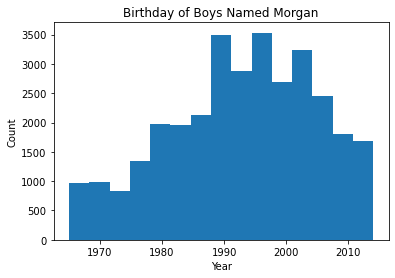

In [27]:
# The fundamental line
fig, ax = plt.subplots()
# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(morgan_boys, bins = 15)
ax.set_title("Birthday of Boys Named Morgan")
ax.set_xlabel('Year')
ax.set_ylabel('Count')

##### Exercise 1

Create an histogram showing the distribution of birth year for girls named "Taylor".

Text(0, 0.5, 'Count')

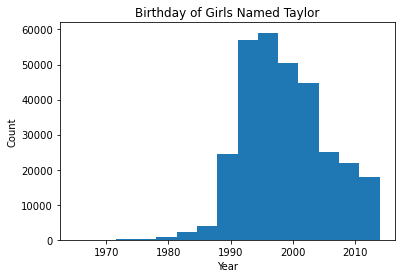

In [28]:
# The fundamental line
fig, ax = plt.subplots()
ax.hist(taylor_girls, bins = 15)
ax.set_title("Birthday of Girls Named Taylor")
ax.set_xlabel('Year')
ax.set_ylabel('Count')

#### Binning

When we compare data, we often want the data in the histogram to be binned identically. Other times, we may want more control on the binning because we care about extracting most information possible from the data. In these cases, we need to take more control of the binning. Fortunately, `ax.hist()` makes it easier to control binning.

##### Use the output

Here, we will compare the birth year distribution for girls named "Morgan" with the birth year distribution of boys named "Morgan". We will create the histograms in two separate `Axes`, but we will make sure the binning of the two histograms are identical. As a first strategy to do so, we will use the output of `ax.hist()`. When called, `ax.hist()` returns three thing:

1. _n_: the height of each bin
2. _bins_: the binning used in the histogram
3. _patches_: the `Patches` created by the histogram (you can pass this to `fig.colorbar()`, for example)

We will be using the second output to control our binning: this output can be directly input in the `bins` argument of `ax.hist()` to create a new histogram with the same binning.

Text(0, 0.5, 'Count')

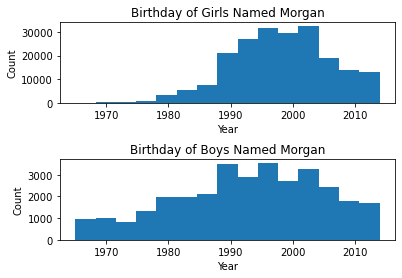

In [30]:
# The fundamental line. We make sure the axis label are displayed correctly by augmenting the height space
fig, ax = plt.subplots(nrows=2, gridspec_kw={'hspace': .7})
# Save the output now ; by convention _ is used as a name for something we do not care
_, bins, _ = ax[0].hist(morgan_girls, bins = 15)
ax[0].set_title("Birthday of Girls Named Morgan")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')
# Notice the bins argument
ax[1].hist(morgan_boys, bins=bins)
ax[1].set_title("Birthday of Boys Named Morgan")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Count')

##### Exercise 2

Complete the following code to display two histograms with the same binning for girls and boys named "Morgan". Use a number of bins equal to 20.

Text(0, 0.5, 'Count')

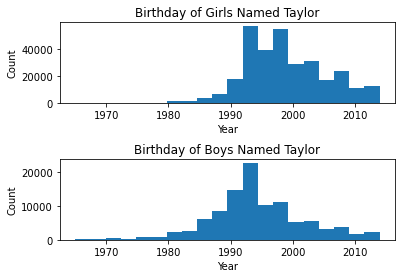

In [26]:
# The fundamental line. We make sure the axis label are displayed correctly by augmenting the height space
fig, ax = plt.subplots(nrows=2, gridspec_kw={'hspace': .7})
# Save the output now ; by convention _ is used as a name for something we do not care
_, bins, _ = ax[0].hist(taylor_girls, bins = 20)
ax[0].set_title("Birthday of Girls Named Taylor")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')
# Notice the bins argument
ax[1].hist(taylor_boys, bins=bins)
ax[1].set_title("Birthday of Boys Named Taylor")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Count')

#### Binning for estimation

If you want to use histograms in a pricipled way to provide a statistical estimation of the data distribution, you will need to implement one of the many binning strategies presented in the literature. Fortunately, `np` provides some ready-available implementation of the most popular statistical binning strategy. In particular, the function `np.histogram_bin_edges()` will calculate the binning following the popular Freedman-Diaconis and Sturgis (R default) binning strategies. We can use the output of this function directly in the `bins` argument of `ax.hist()`. Even if you do not want to adventure in the literature, the Freedman-Diaconis rule is usually a good choice and most likely superior than simply using an arbitrary number of equally-spaced bins (as we have done so far).

Here, we will use the Freedman-Diaconis rule to compare the "Morgan" data, boys and girls. A little care must be put on the input to the Freedman-Diaconis binning rule. The binning will depend on the data size and will become progressively finer as the size increases. Yet, notice that we have ~10 times more girls than boys named "Morgan". So the binning we would get for the boy data would be much coarser than the binning we would get for the girl data. A quick rule of thumb for these cases: when you compare datasets having different data sizes you will want to use the coarser binning to err on the side of robustness. So, we will input the boy data (`morgan_boys`) to the `np.histogram_bin_edges()` function.

<div class="alert alert-block alert-success">
    <b>Binning</b>: The choice of the right binning is fundamental to construct a good histogram. Indeed, you can see the histogram as an estimator. Too many bins means that you put too much confidence in your data. Too few bins means that you are not using your data optimally. And your confidence should change depending on the region of the space -- some region will be more populated than others in your data. <a href="https://docs.astropy.org/en/stable/visualization/histogram.html">This tutorial</a> from AstroPy shows how different binning strategies can tell completely different stories based on the same data. Researchers have investigated binning strategy for decades. The function histogram_bin_edges() implements some of the most popular binning strategies available from literature. These strategy are completely automatic (you do not need to specify the number of bins) and provide a strong theoretical justification for your bins. See <a href="https://docs.astropy.org/en/stable/visualization/histogram.html">the official numpy documentation</a> for an overview of what is available.
        </div>

Text(0, 0.5, 'Count')

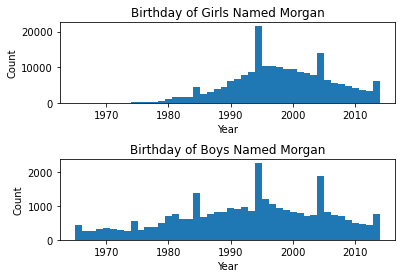

In [29]:
# Calculate binning with the freedman-diaconis rule
# First argument: data, bins: what strategy we use for binning ('fd' is Freedman-Diaconis)
# As data we input the boys data, as discussed above
bins = np.histogram_bin_edges(morgan_boys, bins='fd')

# The fundamental line. We make sure the axis label are displayed correctly by augmenting the height space
fig, ax = plt.subplots(nrows=2, gridspec_kw={'hspace': .7})
# Save the output now ; by convention _ is used as a name for something we do not care
ax[0].hist(morgan_girls, bins=bins)
ax[0].set_title("Birthday of Girls Named Morgan")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')
# Notice the bins argument
ax[1].hist(morgan_boys, bins=bins)
ax[1].set_title("Birthday of Boys Named Morgan")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Count')

##### Exercise 3

Complete the code below to use the Freedman-Diaconis rule for the "Taylor" data. Use the boy data as input to `np.histogram_bin_edges()` (there overall less boys than girls named "Taylor").

**Extra** This histogram looks kind of different from the previous. What do you think is happening with the binning?

Text(0, 0.5, 'Count')

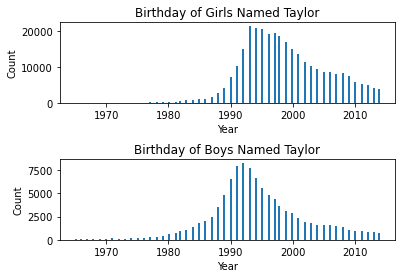

In [31]:
# Calculate binning with the freedman-diaconis rule
# First argument: data, bins: what strategy we use for binning ('fd' is Freedman-Diaconis)
# As data we input the boys data, as discussed above
bins = np.histogram_bin_edges(taylor_boys, bins='fd')

# The fundamental line. We make sure the axis label are displayed correctly by augmenting the height space
fig, ax = plt.subplots(nrows=2, gridspec_kw={'hspace': .7})
# Save the output now ; by convention _ is used as a name for something we do not care
ax[0].hist(taylor_girls, bins=bins)
ax[0].set_title("Birthday of Girls Named Taylor")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')
# Notice the bins argument
ax[1].hist(taylor_boys, bins=bins)
ax[1].set_title("Birthday of Boys Named Taylor")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Count')

#### Two histograms in the same `Axes`

So far, we have used identical bins for histograms in different `Axes`. What about comparing two histograms in the same `Axes`? Beyond binning concerns, we must sure the histograms are well legible. Check what happens when we simply put the histograms together. 

Text(0, 0.5, 'Count')

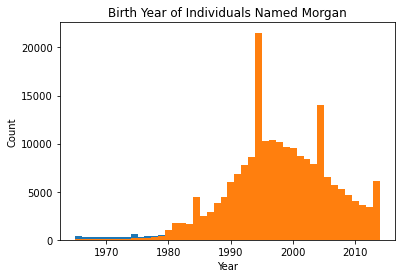

In [33]:
# Calculate binning again
bins = np.histogram_bin_edges(morgan_boys, bins='fd')

# The fundamental line
fig, ax = plt.subplots()
# plot two histograms in the same Axes
ax.hist(morgan_boys, bins=bins)
ax.hist(morgan_girls, bins=bins)
ax.set_title("Birth Year of Individuals Named Morgan")
ax.set_xlabel('Year')
ax.set_ylabel('Count')

The main problem of the previous plot is that the two histograms overlaps without any transparency, so the histogram on the forefront covers the one in the background. There are different strategies to avoid this.

The easiest strategy is to specify the argument `histtype='step'`, which creates non-filled histograms. See below.

While we are at it, we will also create a `legend` in the usual way.

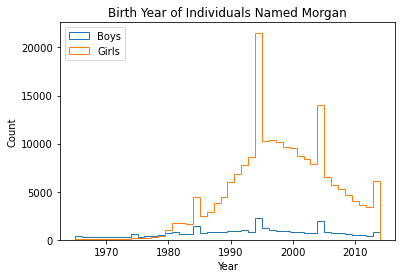

In [36]:
# Calculate binning again
bins = np.histogram_bin_edges(morgan_boys, bins='fd')

# The fundamental line
fig, ax = plt.subplots()
# Notice the histtype argument
ax.hist(morgan_boys, bins=bins, histtype='step', label='Boys')
ax.hist(morgan_girls, bins=bins, histtype='step', label='Girls')
ax.set_title("Birth Year of Individuals Named Morgan")
ax.set_xlabel('Year')
ax.set_ylabel('Count')
# We add a legend
ax.legend(loc='upper left')

##### Exercise 4

Modify the code below to reproduce the same `step`histograms with the "Taylor" data. What is happening in the right part of the plot? How can you modify the code to provide a better visualization?

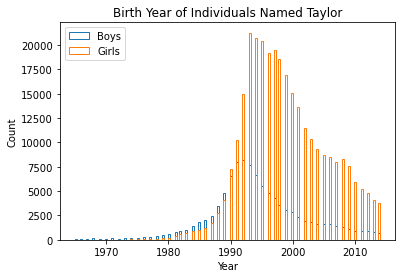

In [39]:
# Calculate binning again
bins = np.histogram_bin_edges(taylor_boys, bins='fd')

# The fundamental line
fig, ax = plt.subplots()
# Notice the histtype argument
ax.hist(taylor_boys, bins=bins, histtype='step', label='Boys')
ax.hist(taylor_girls, bins=bins, histtype='step', label='Girls')
ax.set_title("Birth Year of Individuals Named Taylor")
ax.set_xlabel('Year')
ax.set_ylabel('Count')
# We add a legend
ax.legend(loc='upper left')

As an alternative to the previous strategy, we can use transparency. We will manually set the color of the two data series to be semi-transparent so that it will be clear where they overlap.

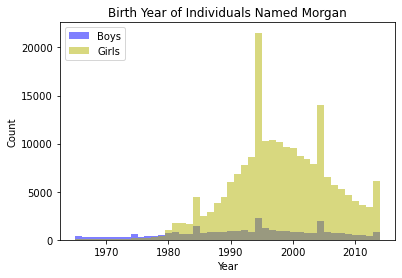

In [43]:
# Calculate binning again
bins = np.histogram_bin_edges(morgan_boys, bins='fd')

# The fundamental line
fig, ax = plt.subplots()
# Notice the color argument. 
ax.hist(morgan_boys, bins=bins, color=(0,0,1,0.5),  label='Boys')
# (1,1,0,0.5) is a semi-transparent yellow
ax.hist(morgan_girls, bins=bins, color=(.7,.7,0,0.5), label='Girls')
ax.set_title("Birth Year of Individuals Named Morgan")
ax.set_xlabel('Year')
ax.set_ylabel('Count')
# We add a legend
ax.legend(loc='upper left')

A final way to compare histograms is to put the histograms from different data series side by side (naturally, with identical binning). This is very easy to achieve. Instead of a single `np.array`, we will pass to `ax.hist()` a list of `np.array` as data: `ax.hist` will automatically do the comparison for us. In our case, we will pass a list containing the boy and girl data for the name "Morgan".

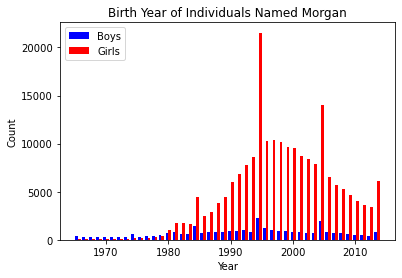

In [54]:
# Calculate binning again
bins = np.histogram_bin_edges(morgan_boys, bins='fd')

# The fundamental line
fig, ax = plt.subplots()
# Notice: we pass a list as data, as label, as color, etc. 
ax.hist([morgan_boys, morgan_girls], bins=bins,  label=['Boys', 'Girls'], color=['blue', 'red'])
ax.set_title("Birth Year of Individuals Named Morgan")
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(loc='upper left')

##### Exercise 5

Modify the code below to produce a side-by-side comparison of the "Taylor" data.

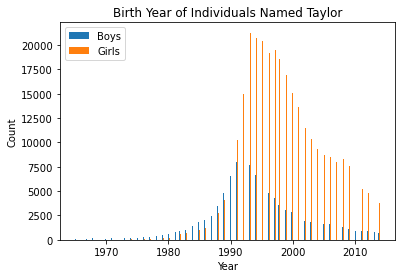

In [53]:
# Calculate binning again
bins = np.histogram_bin_edges(taylor_boys, bins='fd')

# The plot
fig, ax = plt.subplots()
ax.hist([taylor_boys, taylor_girls], bins=bins,  label=['Boys', 'Girls'], color=['red', 'blue'])
ax.set_title("Birth Year of Individuals Named Taylor")
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(loc='upper left')

#### Stacking histograms

Finally, we may want to stack (not overlap) the two histograms. In this way, we will show the overall trend for the data, but we will still show the relative importance of the different components. In this case, we will show the overall contribution of boys and girls to the overall popularity of the name "Morgan".

There are different ways to produce a stacked histogram in `matplotlib`. As usual, you can exercise more or less control on the plot production. Here, we will see the simplest way to produce stacked histograms: when you pass a list of data series (as we did in the plot above), it is sufficient to specify the argument `stacked=True`. For more control, you should check the argument `bottom` from the `ax.hist()` [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist). 

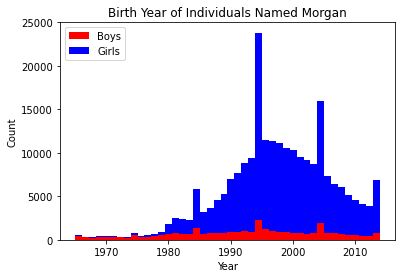

In [56]:
# Calculate binning again
bins = np.histogram_bin_edges(morgan_boys, bins='fd')

# Produce the histogram
fig, ax = plt.subplots()
# The only difference from before: the stacked argument
ax.hist([morgan_boys, morgan_girls], bins=bins,  label=['Boys', 'Girls'], color=['red', 'blue'], stacked=True)
ax.set_title("Birth Year of Individuals Named Morgan")
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(loc='upper left')

### Some thoughts on publication-level plots

With histograms we have covered all the ground we planned to cover at the beginning of this workshop. Before leaving, I would like to comment on how you can (read, I could) produce publication-level plots and what are the best practices when it comes to coding. 

In this same repository you will find a python script where I quickly go through saving a plot into a file. It is meant to be input live in an  IDE to see how an interactive backend works. In general, I would encourage you to:

1. Code in a live fashion in an Integrated Development Environment (IDE). Personally, I use [PyCharm](https://www.jetbrains.com/pycharm/), but there are many valid options available.
2. **Make your plot reproducible**. Following the spirit of open science and open data you should also share the code you used to create the plot you eventually published. As it should be clear by now, plotting may require some complex coding. At the same time, plots are powerful narrative devices: by changing your plots, you can tell different stories about the same data. Therefore, you should make your plotting (narrative) choices as explicit as possible by sharing your plotting code.
3. However, you may not want to water down your main analysis script with over-complicated and long plotting code. I would suggest you share your plotting code in separate files or you create plotter functions to be imported. 

Now we will do some live-coding!